In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

%matplotlib inline

### Ngram

In [4]:
all_ngram = glob("ngram_baseline/*.pkl")

all_ngram = [load_pickle(f) for f in all_ngram]

df_ngram = pd.DataFrame(all_ngram)

In [7]:
grouped_ngram = df_ngram.groupby(['representation', 'num_classes', 'train_size'])[['representation', 'num_classes', 'train_size', 'accuracy', 'f1_macro', 'f1_micro', 'kappa']].agg(['mean', 'std', sem])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_11217/2896603964.py:1: FutureWarning: ['representation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_ngram = df_ngram.groupby(['representation', 'num_classes', 'train_size'])[['representation', 'num_classes', 'train_size', 'accuracy', 'f1_macro', 'f1_micro', 'kappa']].agg(['mean', 'std', sem])


## Load results

In [8]:
all_out = glob("out/**/*.pkl")

In [9]:
all_out = [load_pickle(p) for p in all_out]

In [10]:
extracted_res = []

ohe_tanimoto_res = []
rxnfp_linear_res = []
rxnfp_rbf_res = []
drfp_linear_res = []
drfp_rbf_res = []

for out in all_out:
    res = {
        "train_size": out["train_size"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
        "num_classes": out["num_classes"],
        "one_hot": out["one_hot"],
    }

    res_ohe_tanimoto = {
        "frac_valid": out["baseline"]["metrics"]["ohe-tanimoto"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["ohe-tanimoto"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["ohe-tanimoto"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["ohe-tanimoto"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["ohe-tanimoto"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_rxnfp_linear = {
        "frac_valid": out["baseline"]["metrics"]["rxnfp-linear"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["rxnfp-linear"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["rxnfp-linear"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["rxnfp-linear"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["rxnfp-linear"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_rxnfp_rbf = {
        "frac_valid": out["baseline"]["metrics"]["rxnfp-rbf"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["rxnfp-rbf"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["rxnfp-rbf"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["rxnfp-rbf"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["rxnfp-rbf"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_drfp_rbf = {
        "frac_valid": out["baseline"]["metrics"]["drfp-rbf"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["drfp-rbf"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["drfp-rbf"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["drfp-rbf"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["drfp-rbf"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_drfp_linear = {
        "frac_valid": out["baseline"]["metrics"]["drfp-linear"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["drfp-linear"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["drfp-linear"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["drfp-linear"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["drfp-linear"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    extracted_res.append(res)

    ohe_tanimoto_res.append(res_ohe_tanimoto)

    rxnfp_linear_res.append(res_rxnfp_linear)

    rxnfp_rbf_res.append(res_rxnfp_rbf)

    drfp_linear_res.append(res_drfp_linear)

    drfp_rbf_res.append(res_drfp_rbf)

In [11]:
extracted_res = pd.DataFrame(extracted_res)
ohe_tanimoto_res = pd.DataFrame(ohe_tanimoto_res)
rxnfp_linear_res = pd.DataFrame(rxnfp_linear_res)
rxnfp_rbf_res = pd.DataFrame(rxnfp_rbf_res)
drfp_linear_res = pd.DataFrame(drfp_linear_res)
drfp_rbf_res = pd.DataFrame(drfp_rbf_res)

In [12]:
extracted_res

,train_size,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,one_hot
0,50,1.0,0.33,0.311551,0.33,0.1625,5,True
1,200,1.0,0.78,0.779205,0.78,0.5600,2,True
2,200,1.0,0.79,0.789474,0.79,0.5800,2,False
3,10,1.0,0.16,0.159662,0.16,-0.0500,5,True
4,10,1.0,0.10,0.105455,0.10,-0.1250,5,True
...,...,...,...,...,...,...,...,...
73,50,1.0,0.77,0.769793,0.77,0.5400,2,True
74,100,1.0,0.39,0.379582,0.39,0.2375,5,True
75,20,1.0,0.23,0.205379,0.23,0.0375,5,True
76,50,1.0,0.65,0.648277,0.65,0.3000,2,True


In [13]:
ohe_tanimoto_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.29,0.266815,0.29,0.1125,5,50
1,1.0,0.82,0.819350,0.82,0.6400,2,200
2,1.0,0.82,0.819350,0.82,0.6400,2,200
3,1.0,0.20,0.066667,0.20,0.0000,5,10
4,1.0,0.20,0.066667,0.20,0.0000,5,10
...,...,...,...,...,...,...,...
73,1.0,0.76,0.747793,0.76,0.5200,2,50
74,1.0,0.30,0.220987,0.30,0.1250,5,100
75,1.0,0.28,0.185530,0.28,0.1000,5,20
76,1.0,0.65,0.649123,0.65,0.3000,2,50


In [14]:
rxnfp_linear_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.25,0.146346,0.25,0.0625,5,50
1,1.0,0.76,0.758454,0.76,0.5200,2,200
2,1.0,0.76,0.758454,0.76,0.5200,2,200
3,1.0,0.20,0.066667,0.20,0.0000,5,10
4,1.0,0.20,0.066667,0.20,0.0000,5,10
...,...,...,...,...,...,...,...
73,1.0,0.69,0.687468,0.69,0.3800,2,50
74,1.0,0.25,0.157356,0.25,0.0625,5,100
75,1.0,0.24,0.135714,0.24,0.0500,5,20
76,1.0,0.58,0.558638,0.58,0.1600,2,50


In [15]:
rxnfp_rbf_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.22,0.116332,0.22,0.0250,5,50
1,1.0,0.77,0.769424,0.77,0.5400,2,200
2,1.0,0.77,0.769424,0.77,0.5400,2,200
3,1.0,0.22,0.200373,0.22,0.0250,5,10
4,1.0,0.20,0.069565,0.20,0.0000,5,10
...,...,...,...,...,...,...,...
73,1.0,0.70,0.698068,0.70,0.4000,2,50
74,1.0,0.30,0.225932,0.30,0.1250,5,100
75,1.0,0.19,0.079670,0.19,-0.0125,5,20
76,1.0,0.58,0.509116,0.58,0.1600,2,50


In [16]:
drfp_linear_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.31,0.285114,0.31,0.1375,5,50
1,1.0,0.75,0.745702,0.75,0.5000,2,200
2,1.0,0.75,0.745702,0.75,0.5000,2,200
3,1.0,0.20,0.066667,0.20,0.0000,5,10
4,1.0,0.20,0.066667,0.20,0.0000,5,10
...,...,...,...,...,...,...,...
73,1.0,0.68,0.648352,0.68,0.3600,2,50
74,1.0,0.29,0.205032,0.29,0.1125,5,100
75,1.0,0.24,0.137582,0.24,0.0500,5,20
76,1.0,0.50,0.333333,0.50,0.0000,2,50


In [17]:
drfp_rbf_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.26,0.221005,0.26,0.0750,5,50
1,1.0,0.79,0.789474,0.79,0.5800,2,200
2,1.0,0.79,0.789474,0.79,0.5800,2,200
3,1.0,0.20,0.066667,0.20,0.0000,5,10
4,1.0,0.20,0.066667,0.20,0.0000,5,10
...,...,...,...,...,...,...,...
73,1.0,0.73,0.717544,0.73,0.4600,2,50
74,1.0,0.20,0.066667,0.20,0.0000,5,100
75,1.0,0.22,0.137243,0.22,0.0250,5,20
76,1.0,0.63,0.629667,0.63,0.2600,2,50


In [18]:
grouped_extracted_res = extracted_res.groupby(["num_classes", "train_size", "one_hot"]).agg(
    ["mean", "std", sem]
)

grouped_ohe_tanimoto_res = ohe_tanimoto_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_rxnfp_linear_res = rxnfp_linear_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_rxnfp_rbf_res = rxnfp_rbf_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_drfp_linear_res = drfp_linear_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_drfp_rbf_res = drfp_rbf_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

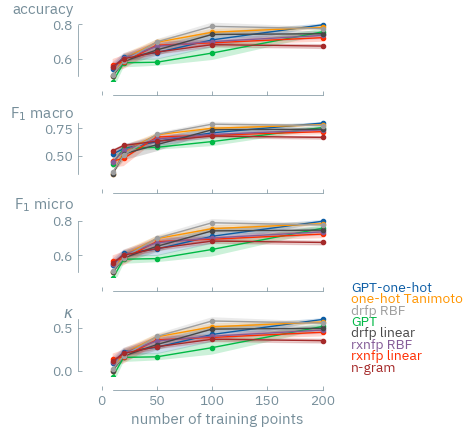

In [23]:
fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_extracted_res.loc[2, :, True].index,
        grouped_extracted_res.loc[2, :, True][metric]["mean"],
        marker="o",
        label="GPT-one-hot",
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[2, :, True].index,
        grouped_extracted_res.loc[2, :, True][metric]["mean"]
        - grouped_extracted_res.loc[2, :, True][metric]["sem"],
        grouped_extracted_res.loc[2, :, True][metric]["mean"]
        + grouped_extracted_res.loc[2, :, True][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_extracted_res.loc[2, :, True].index,
        np.stack(
            [
                grouped_extracted_res.loc[2, :, True][metric]["mean"],
                grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"],
                grouped_rxnfp_linear_res.loc[2, :][metric]["mean"],
                grouped_drfp_linear_res.loc[2, :][metric]["mean"],
                grouped_drfp_rbf_res.loc[2, :][metric]["mean"],
            ]
        ).flatten(),
    )

    ax[i].plot(
        grouped_extracted_res.loc[2, :, False].index,
        grouped_extracted_res.loc[2, :, False][metric]["mean"],
        marker="o",
        label="GPT",
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[2, :, False].index,
        grouped_extracted_res.loc[2, :, False][metric]["mean"]
        - grouped_extracted_res.loc[2, :, False][metric]["sem"],
        grouped_extracted_res.loc[2, :, False][metric]["mean"]
        + grouped_extracted_res.loc[2, :, False][metric]["sem"],
        alpha=0.2,
    )

    # ax[i].plot(
    #     grouped_extracted_res.loc[2,:, False].index,
    #     grouped_extracted_res.loc[2,:, False][metric]['mean'],
    #     marker='o',
    #     label='GPT',
    # )
    # ax[i].fill_between(
    #     grouped_extracted_res.loc[2,:,False].index,
    #     grouped_extracted_res.loc[2,:, False][metric]['mean'] - grouped_extracted_res.loc[2,:, False][metric]['sem'],
    #     grouped_extracted_res.loc[2,:, False][metric]['mean'] + grouped_extracted_res.loc[2,:, False][metric]['sem'],
    #     alpha=0.2,
    # )

    ax[i].plot(
        grouped_ohe_tanimoto_res.loc[2, :].index,
        grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"],
        marker="o",
        label="one-hot Tanimoto",
    )
    ax[i].fill_between(
        grouped_ohe_tanimoto_res.loc[2, :].index,
        grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"]
        - grouped_ohe_tanimoto_res.loc[2, :][metric]["sem"],
        grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"]
        + grouped_ohe_tanimoto_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_linear_res.loc[2, :].index,
        grouped_rxnfp_linear_res.loc[2, :][metric]["mean"],
        marker="o",
        label="rxnfp linear",
    )
    ax[i].fill_between(
        grouped_rxnfp_linear_res.loc[2, :].index,
        grouped_rxnfp_linear_res.loc[2, :][metric]["mean"]
        - grouped_rxnfp_linear_res.loc[2, :][metric]["sem"],
        grouped_rxnfp_linear_res.loc[2, :][metric]["mean"]
        + grouped_rxnfp_linear_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_rbf_res.loc[2, :].index,
        grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"],
        marker="o",
        label="rxnfp RBF",
    )
    ax[i].fill_between(
        grouped_rxnfp_rbf_res.loc[2, :].index,
        grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"]
        - grouped_rxnfp_rbf_res.loc[2, :][metric]["sem"],
        grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"]
        + grouped_rxnfp_rbf_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_linear_res.loc[2, :].index,
        grouped_drfp_linear_res.loc[2, :][metric]["mean"],
        marker="o",
        label="drfp linear",
    )
    ax[i].fill_between(
        grouped_drfp_linear_res.loc[2, :].index,
        grouped_drfp_linear_res.loc[2, :][metric]["mean"]
        - grouped_drfp_linear_res.loc[2, :][metric]["sem"],
        grouped_drfp_linear_res.loc[2, :][metric]["mean"]
        + grouped_drfp_linear_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_rbf_res.loc[2, :].index,
        grouped_drfp_rbf_res.loc[2, :][metric]["mean"],
        marker="o",
        label="drfp RBF",
    )
    ax[i].fill_between(
        grouped_drfp_rbf_res.loc[2, :].index,
        grouped_drfp_rbf_res.loc[2, :][metric]["mean"]
        - grouped_drfp_rbf_res.loc[2, :][metric]["sem"],
        grouped_drfp_rbf_res.loc[2, :][metric]["mean"]
        + grouped_drfp_rbf_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_ngram.loc["rxn", 2, :].index,
        grouped_ngram.loc["rxn", 2, :][metric]["mean"],
        marker="o",
        label="n-gram",
        c='brown'
    )
    ax[i].fill_between(
        grouped_ngram.loc["rxn", 2, :].index,
        grouped_ngram.loc["rxn", 2, :][metric]["mean"]
        - grouped_ngram.loc["rxn", 2, :][metric]["sem"],
        grouped_ngram.loc["rxn", 2, :][metric]["mean"]
        + grouped_ngram.loc["rxn", 2, :][metric]["sem"],
        alpha=0.2,
        color='brown'
    )

matplotx.line_labels(ax[-1])

ylabel_top("accuracy", ax=ax[0], x_pad=0.05)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], x_pad=0.05, y_pad=-0.01)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], x_pad=0.05)
ylabel_top(r"$\kappa$", ax=ax[3], x_pad=0.05)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

ax[-1].set_xlabel("number of training points", labelpad=4)
fig.savefig("rxn-suzuki-classification_results_2.pdf", bbox_inches="tight")

In [15]:
find_learning_curve_intersection(
    grouped_extracted_res.loc[2, :, True]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_rxnfp_rbf_res.loc[2, :].index,
        grouped_rxnfp_rbf_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

1.5139375914865343

In [27]:
find_learning_curve_intersection(
    grouped_extracted_res.loc[2, :, True]["f1_macro"]["mean"].values[0] + grouped_extracted_res.loc[2, :, True]["f1_macro"]["sem"].values[0],
    fit_learning_curve(
        grouped_ngram.loc["rxn",2, :].index,
        grouped_ngram.loc["rxn",2, :]["f1_macro"]["mean"] + grouped_ngram.loc["rxn",2, :]["f1_macro"]["sem"],
    )[0],
) / 10

0.9777536159117318

In [16]:
intersections = []

for i, val in enumerate(grouped_extracted_res.loc[2, :, True].index):
    factor = (
        find_learning_curve_intersection(
            grouped_extracted_res.loc[2, :, True]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_ohe_tanimoto_res.loc[2, :].index,
                grouped_ohe_tanimoto_res.loc[2, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections.append(factor)

In [17]:
from gptchem.evaluator import add_kappa_vlines

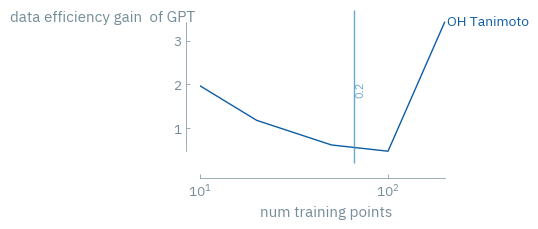

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_extracted_res.loc[2, :, False].index, intersections, label="OH Tanimoto")

matplotx.line_labels()
add_kappa_vlines(
    grouped_extracted_res.loc[2, :, False].index,
    grouped_extracted_res.loc[2, :, False]["kappa"]["mean"],
    ymax=3.7,
)
matplotx.ylabel_top("data efficiency gain  of GPT")
ax.set_xlabel("num training points", labelpad=4)

ax.set_xscale("log")
range_frame(ax, grouped_extracted_res.loc[2, :, False].index, np.array(intersections))
plt.savefig("rxnsuzuki-2-data-efficiency.pdf", bbox_inches="tight")

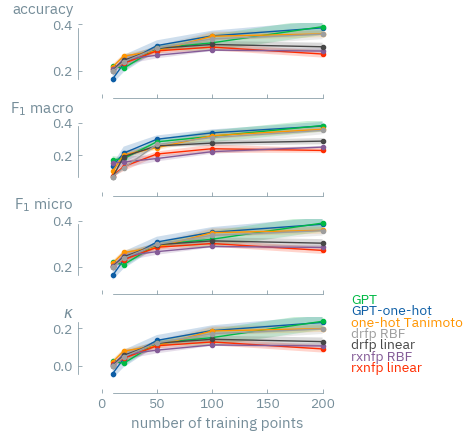

In [19]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_extracted_res.loc[5, :, True].index,
        grouped_extracted_res.loc[5, :, True][metric]["mean"],
        marker="o",
        label="GPT-one-hot",
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[5, :, True].index,
        grouped_extracted_res.loc[5, :, True][metric]["mean"]
        - grouped_extracted_res.loc[5, :, True][metric]["sem"],
        grouped_extracted_res.loc[5, :, True][metric]["mean"]
        + grouped_extracted_res.loc[5, :, True][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_extracted_res.loc[5, :, True].index,
        np.stack(
            [
                grouped_extracted_res.loc[5, :, True][metric]["mean"],
                grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"],
                grouped_rxnfp_linear_res.loc[5, :][metric]["mean"],
                grouped_drfp_linear_res.loc[5, :][metric]["mean"],
                grouped_drfp_rbf_res.loc[5, :][metric]["mean"],
            ]
        ).flatten(),
    )

    ax[i].plot(
        grouped_extracted_res.loc[5, :, False].index,
        grouped_extracted_res.loc[5, :, False][metric]["mean"],
        marker="o",
        label="GPT",
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[5, :, False].index,
        grouped_extracted_res.loc[5, :, False][metric]["mean"]
        - grouped_extracted_res.loc[5, :, False][metric]["sem"],
        grouped_extracted_res.loc[5, :, False][metric]["mean"]
        + grouped_extracted_res.loc[5, :, False][metric]["sem"],
        alpha=0.2,
    )

    # ax[i].plot(
    #     grouped_extracted_res.loc[5,:, False].index,
    #     grouped_extracted_res.loc[5,:, False][metric]['mean'],
    #     marker='o',
    #     label='GPT',
    # )
    # ax[i].fill_between(
    #     grouped_extracted_res.loc[5,:,False].index,
    #     grouped_extracted_res.loc[5,:, False][metric]['mean'] - grouped_extracted_res.loc[5,:, False][metric]['sem'],
    #     grouped_extracted_res.loc[5,:, False][metric]['mean'] + grouped_extracted_res.loc[5,:, False][metric]['sem'],
    #     alpha=0.2,
    # )

    ax[i].plot(
        grouped_ohe_tanimoto_res.loc[5, :].index,
        grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"],
        marker="o",
        label="one-hot Tanimoto",
    )
    ax[i].fill_between(
        grouped_ohe_tanimoto_res.loc[5, :].index,
        grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"]
        - grouped_ohe_tanimoto_res.loc[5, :][metric]["sem"],
        grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"]
        + grouped_ohe_tanimoto_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_linear_res.loc[5, :].index,
        grouped_rxnfp_linear_res.loc[5, :][metric]["mean"],
        marker="o",
        label="rxnfp linear",
    )
    ax[i].fill_between(
        grouped_rxnfp_linear_res.loc[5, :].index,
        grouped_rxnfp_linear_res.loc[5, :][metric]["mean"]
        - grouped_rxnfp_linear_res.loc[5, :][metric]["sem"],
        grouped_rxnfp_linear_res.loc[5, :][metric]["mean"]
        + grouped_rxnfp_linear_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_rbf_res.loc[5, :].index,
        grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"],
        marker="o",
        label="rxnfp RBF",
    )
    ax[i].fill_between(
        grouped_rxnfp_rbf_res.loc[5, :].index,
        grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"]
        - grouped_rxnfp_rbf_res.loc[5, :][metric]["sem"],
        grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"]
        + grouped_rxnfp_rbf_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_linear_res.loc[5, :].index,
        grouped_drfp_linear_res.loc[5, :][metric]["mean"],
        marker="o",
        label="drfp linear",
    )
    ax[i].fill_between(
        grouped_drfp_linear_res.loc[5, :].index,
        grouped_drfp_linear_res.loc[5, :][metric]["mean"]
        - grouped_drfp_linear_res.loc[5, :][metric]["sem"],
        grouped_drfp_linear_res.loc[5, :][metric]["mean"]
        + grouped_drfp_linear_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_rbf_res.loc[5, :].index,
        grouped_drfp_rbf_res.loc[5, :][metric]["mean"],
        marker="o",
        label="drfp RBF",
    )
    ax[i].fill_between(
        grouped_drfp_rbf_res.loc[5, :].index,
        grouped_drfp_rbf_res.loc[5, :][metric]["mean"]
        - grouped_drfp_rbf_res.loc[5, :][metric]["sem"],
        grouped_drfp_rbf_res.loc[5, :][metric]["mean"]
        + grouped_drfp_rbf_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

matplotx.line_labels(ax[-1])

ylabel_top("accuracy", ax=ax[0], x_pad=0.05)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], x_pad=0.05, y_pad=-0.01)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], x_pad=0.05)
ylabel_top(r"$\kappa$", ax=ax[3], x_pad=0.05)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
ax[-1].set_xlabel("number of training points", labelpad=4)

fig.savefig("rxn-suzuki-classification_results_5.pdf", bbox_inches="tight")

In [20]:
intersections = []

for i, val in enumerate(grouped_extracted_res.loc[5, :, True].index):
    factor = (
        find_learning_curve_intersection(
            grouped_extracted_res.loc[5, :, True]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_ohe_tanimoto_res.loc[5, :].index,
                grouped_ohe_tanimoto_res.loc[5, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections.append(factor)

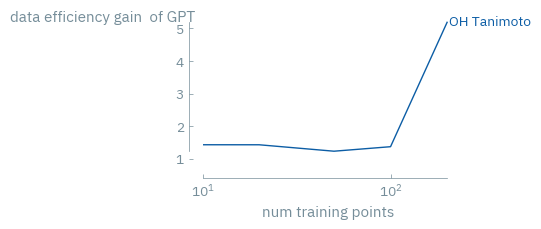

In [21]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_extracted_res.loc[5, :, False].index, intersections, label="OH Tanimoto")

matplotx.line_labels()
add_kappa_vlines(
    grouped_extracted_res.loc[5, :, False].index,
    grouped_extracted_res.loc[5, :, False]["kappa"]["mean"],
    ymax=3.7,
)
ylabel_top("data efficiency gain  of GPT", y_pad=-0.15)
ax.set_xlabel("num training points", labelpad=4)

ax.set_xscale("log")
range_frame(ax, grouped_extracted_res.loc[2, :, False].index, np.array(intersections))
plt.savefig("rxnsuzuki-5-data-efficiency.pdf", bbox_inches="tight")